# SCIKIT TUTORIALS

In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import *

In [11]:
os.getcwd()

'C:\\Users\\Anish'

In [12]:
data=pd.read_csv(os.getcwd()+'\\Downloads\\2019\\final.csv')

In [13]:
data

,r,tmin,tmax,hmin,hmax,wmin,wmax,date,month
0,0.0,9.8,28.6,18.60,73.2,0.0,8.1,1,1
1,0.0,14.5,29.7,18.50,63.4,0.0,5.2,2,1
2,0.0,12.3,30.1,25.10,83.2,0.0,9.1,3,1
3,0.0,13.9,31.8,21.60,83.1,0.0,7.1,4,1
4,0.0,15.1,30.7,32.30,89.0,0.0,0.1,5,1
...,...,...,...,...,...,...,...,...,...
339,0.0,19.6,27.2,74.20,100.0,0.0,11.0,27,12
340,0.0,18.9,28.3,74.60,95.4,0.0,10.5,28,12
341,0.0,16.9,27.1,72.40,88.0,0.0,10.5,29,12
342,0.0,16.0,27.0,69.75,98.6,0.0,8.6,30,12


In [14]:
trainx=[[23.90,30.10,74.20,94.60,0.6,2.6,24,29,76,85,0,6,0.8]]
trainy=[3.5]
for i in range(1,70):
    trainx.append([data['tmin'][i],data['tmax'][i],data['hmin'][i],data['hmax'][i],data['wmin'][i],data['wmax'][i],
                   data['tmin'][i-1],data['tmax'][i-1],data['hmin'][i-1],data['hmax'][i-1],data['wmin'][i-1],data['wmax'][i-1],data['r'][i-1]])
    trainy.append(data['r'][i])

In [15]:
xt=[]
for i in range(0,70):
    xt.append(i)

In [17]:
m=tf.keras.models.Sequential([tf.keras.layers.Dense(1,activation='relu'),
                   tf.keras.layers.Dense(1024,activation='relu'),
                   tf.keras.layers.Dense(512,activation='relu'),
                   tf.keras.layers.Dense(1024,activation='relu'),
                   tf.keras.layers.Dense(1024,activation='relu'),
                   tf.keras.layers.Dense(1,activation='relu')])
m.compile(optimizer='adam',loss='mean_squared_error')
m.fit(trainx,trainy,epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 39ms/step - loss: 72.9765
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 6.8027
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 6.8027
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 6.8027
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 6.8027
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 6.8027
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 6.8027
Epoch 8/100
3/3 [==============================] - 0s 20ms/step - loss: 6.8027
Epoch 9/100
3/3 [==============================] - 0s 19ms/step - loss: 6.8027
Epoch 10/100
3/3 [==============================] - 0s 19ms/step - loss: 6.8027
Epoch 11/100
3/3 [==============================] - 0s 20ms/step - loss: 6.8027
Epoch 12/100
3/3 [==============================] - 0s 20ms/step - loss: 6.8027
Epoch 13/100
3/3 [==============================

In [9]:
t11=[]
h11=[]
ti=[]
t12=[]
for i in range(70):
    t11.append([data['temp_max '][i]-data['temp_min '][i]])
    q=-data['humidity_min (%)'][i]+data['Humidity_max (%)'][i]
    h11.append([q])
    ti.append(i)
    t12.append(data['temp_max '][i]-data['temp_min '][i])

In [234]:
reg=LinearRegression().fit(h11,t11)

In [310]:
yp=[]
for i in range(70):
    yp.append(reg.predict([h11[i]]).item())

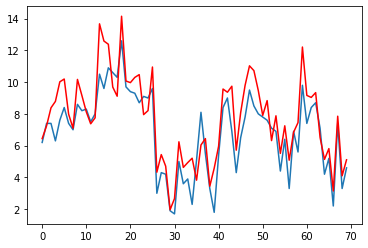

In [311]:
plt.plot(ti,t12)
plt.plot(ti,yp,color='red')

In [308]:
reg.coef_=reg.coef_+0.035

In [309]:
reg.coef_

array([[0.2518092]])